### Integrantes

- Juan José Naranjo Velasquez 
- Diego Alejandro Mora Suarez
- Kenneth David Leonel Triana

Dependencias

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import multivariate_normal

Importar base de datos

In [57]:
datosAerolineas = pd.read_excel("data/EastWestAirlines.xlsx", engine="openpyxl", sheet_name="data")
datosAerolineas.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


###  Limpieza de los datos de la aérolinea

Revisión de nulos

In [58]:
#Revisar que no tengan datos nulos los campos de la aérolinea

datosAerolineas.isnull().sum()


ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [59]:
#Revisar datos máximos y minimos con el método describe
datosAerolineas.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


Al analizar los datos se determina que el campo ID no es relevante ese identificadro unico para todo el proceso de clusterización

In [60]:
#Eliminar columna ID
datosAerolineas = datosAerolineas.drop(columns="ID#")
#Dejar para manipular más facil los datos dejar las columna en minuscula
datosAerolineas.columns = datosAerolineas.columns.str.lower()
#Renombrar columna award para que no quede con el simbolo de pregunta 
datosAerolineas.rename(columns={"award?": "award"}, inplace=True)
datosAerolineas.head()

,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


### Escalar los datos

In [61]:
#Se escalan los datos ya que hay unas feature donde sus valores son muy altos 
scaler = StandardScaler()
datosAerolineas_escalados = scaler.fit_transform(datosAerolineas)
datosAerolineas_escalados = pd.DataFrame(datosAerolineas_escalados, columns=datosAerolineas.columns)
datosAerolineas_escalados.head()

,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


Visualizar datos

d:\programasProgramacion\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\programasProgramacion\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\programasProgramacion\anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\programasProgramacion\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: Fut

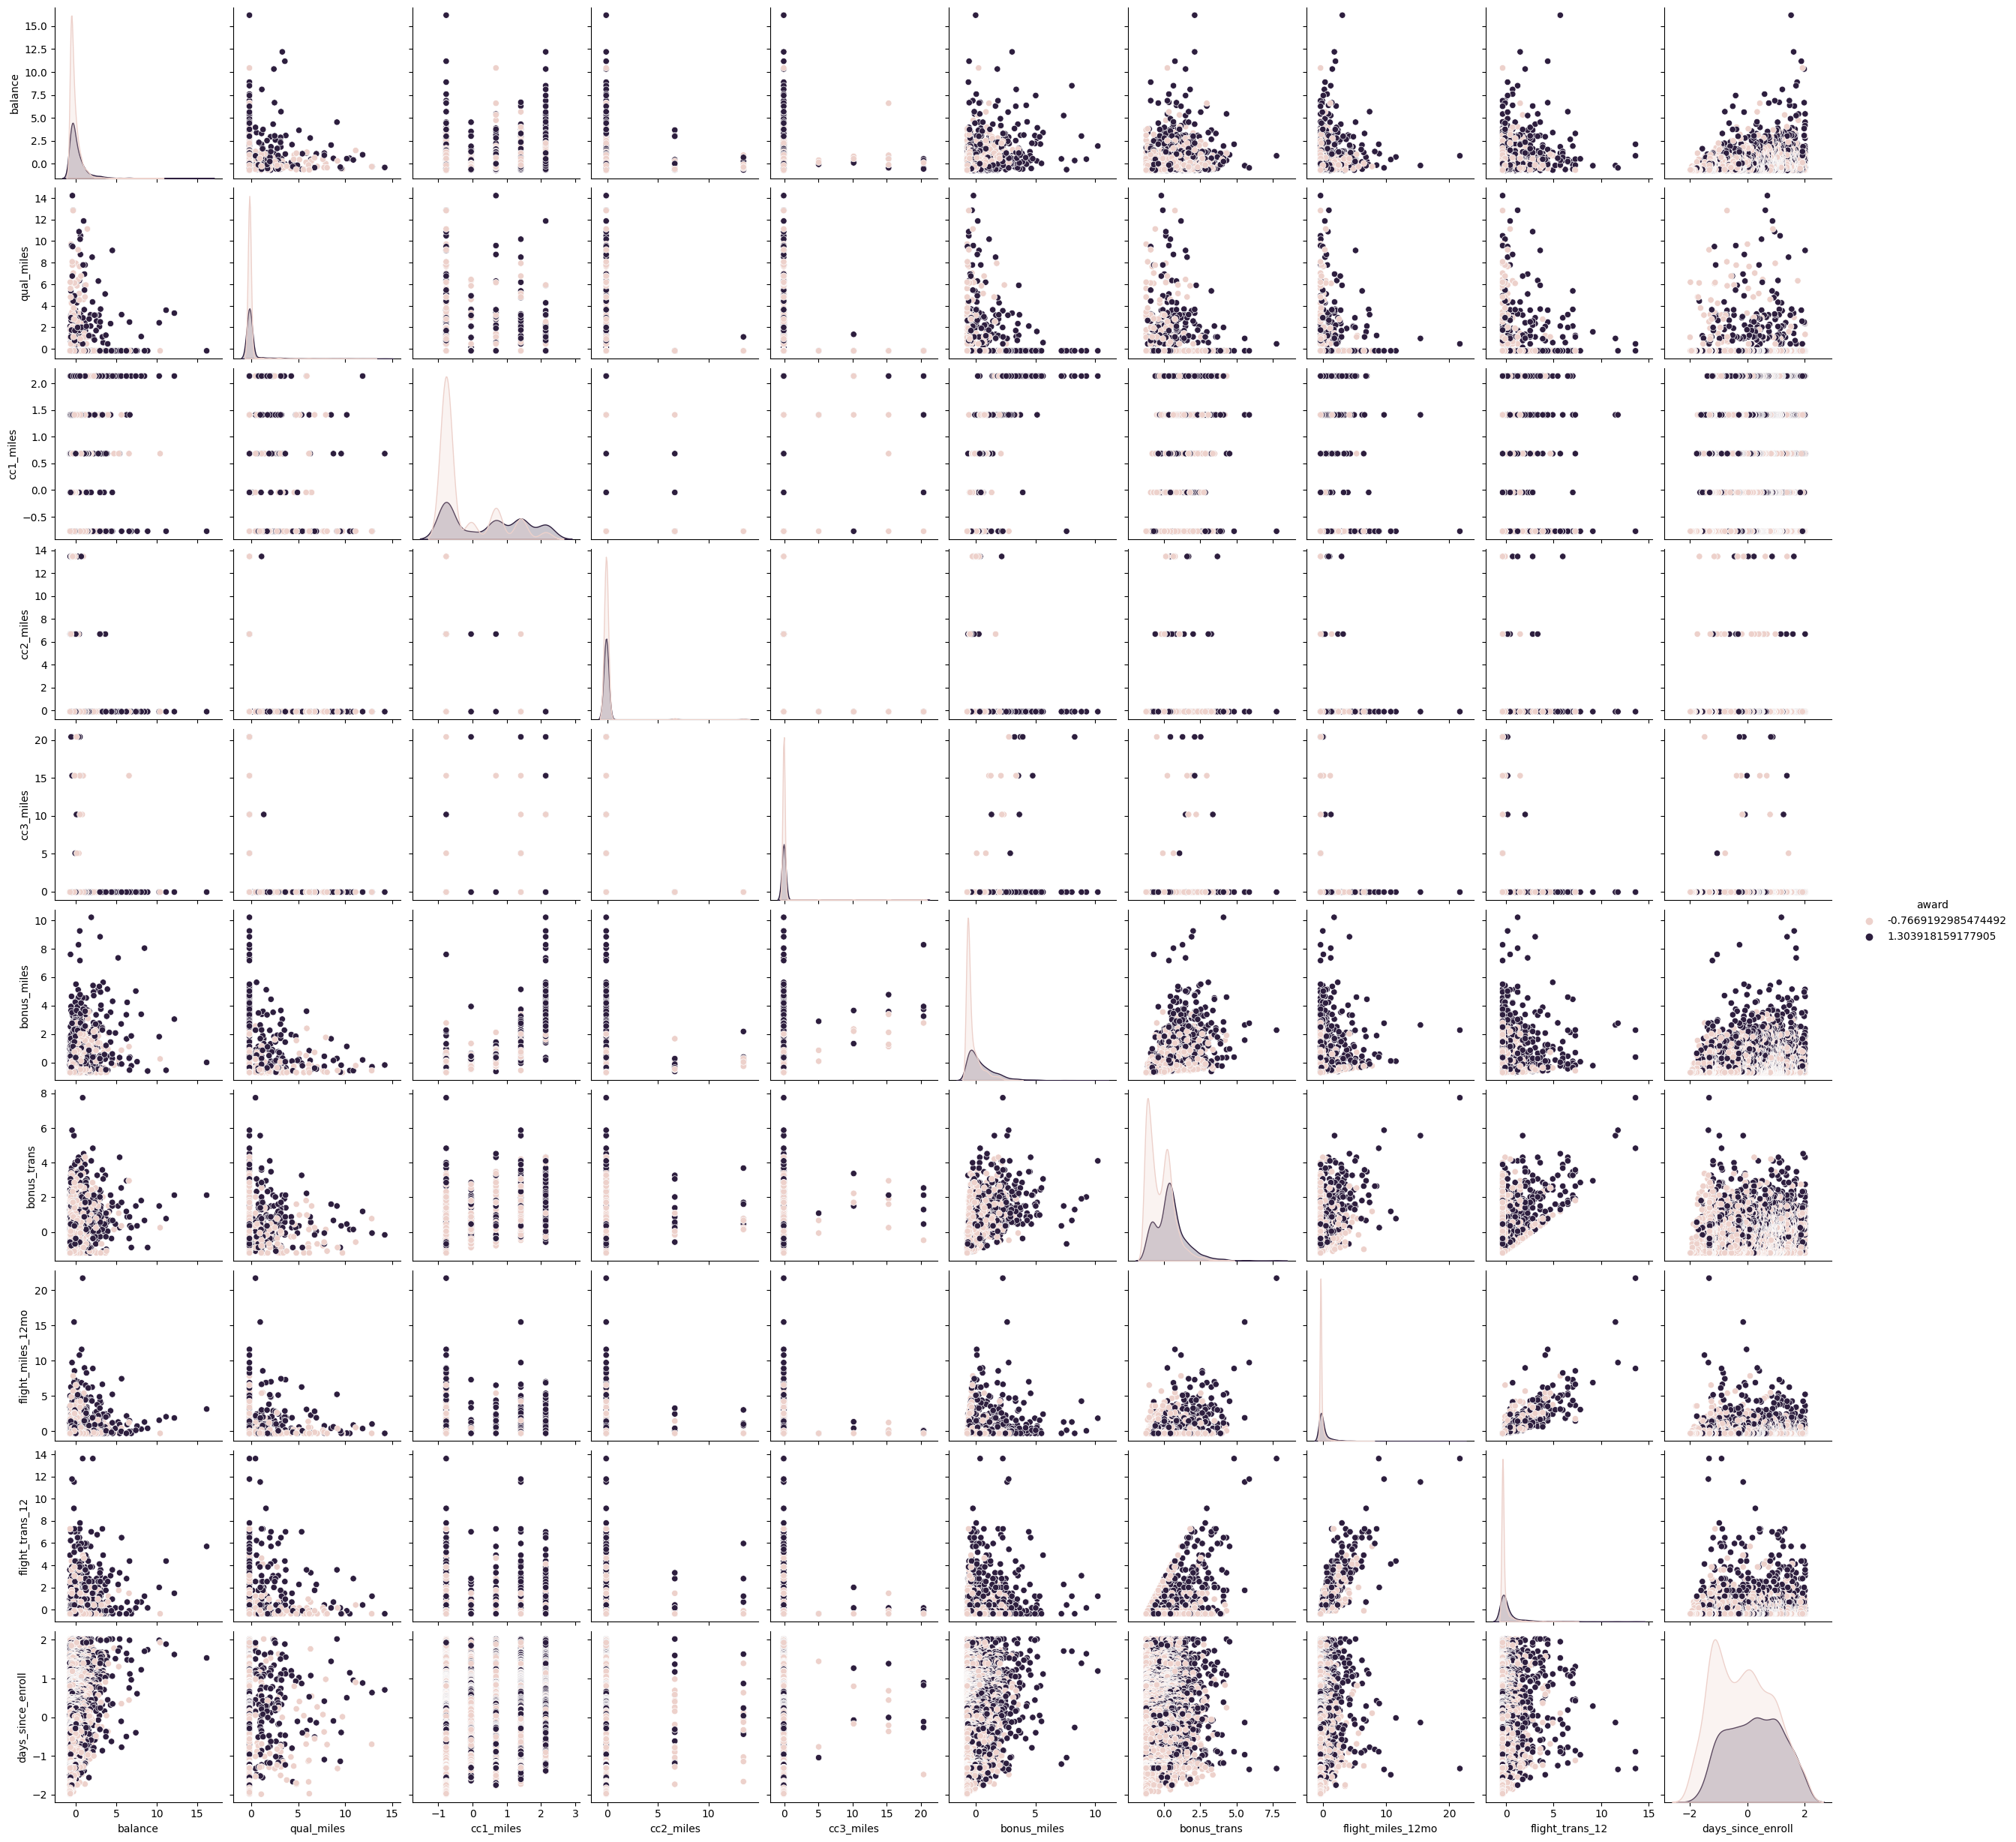

In [62]:
sns.pairplot(datosAerolineas_escalados, hue='award')

Después de ver los resultados podemos ver que las características qual_miles y days_since_enroll son las qeu detallan una mejor dispersión de los datos ya que las otras se ven muy agrupados.

In [63]:
datosAerolineas_escalados.head()

,balance,qual_miles,cc1_miles,cc2_miles,cc3_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12,days_since_enroll,award
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


In [64]:
# Seleccionemos como prueba los features 1, 9 que son las que mejor dispersión tiene en la gráfica anterior
X_2d = datosAerolineas_escalados.iloc[:,[1,9]]
X_2d

,qual_miles,days_since_enroll
0,-0.186299,1.395454
1,-0.186299,1.379957
2,-0.186299,1.411920
3,-0.186299,1.372208
4,-0.186299,1.363975
...,...,...
3994,-0.186299,-1.315120
3995,-0.186299,-1.318994
3996,-0.186299,-1.315604
3997,-0.186299,-1.316088


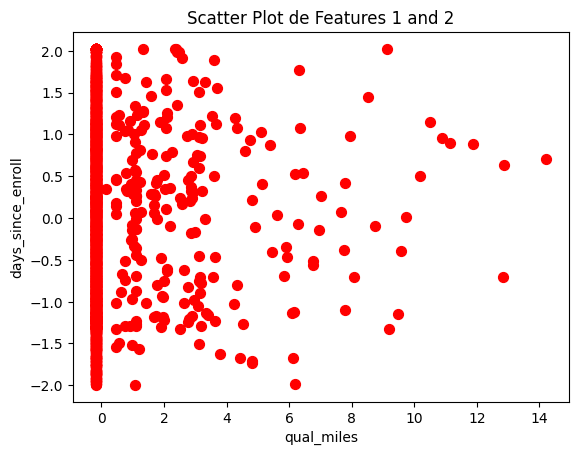

In [65]:


plt.scatter(X_2d.iloc[:,0], X_2d.iloc[:,1], marker='o', color='r', s=50)
plt.xlabel('qual_miles')
plt.ylabel('days_since_enroll')
plt.title('Scatter Plot de Features 1 and 2')
plt.show()

Se empieza a evaluar los parámetros 

In [98]:
# Inicializar aleatoriamente los theta_old
# Fija el número de clusters K = 3
np.random.seed(42)
pi1 = 0.25
pi2 = 0.45
pi3 = 0.3
mu_1 = np.random.randn(2,) + np.reshape([1,0],(2,))
mu_2 = np.random.randn(2,) + np.reshape([6,0],(2,))
mu_3 = np.random.randn(2,) + np.reshape([10,0],(2,))

In [99]:
aux = np.random.randn(2,2)
print(aux)
print(aux.T)
print(aux.T@aux)

[[ 1.57921282  0.76743473]
 [-0.46947439  0.54256004]]
[[ 1.57921282 -0.46947439]
 [ 0.76743473  0.54256004]]
[[2.71431932 0.95722472]
 [0.95722472 0.88332746]]


In [100]:
aux = np.random.randn(2,2)
Sigma_1 =0.5*aux.T@aux
aux2 = np.random.randn(2,2)
Sigma_2 = 0.5*aux2.T@aux2
aux3 = np.random.randn(2,2)
Sigma_3 = 0.5*aux3.T@aux3
print(Sigma_1, np.linalg.det(Sigma_1))
print(Sigma_2, np.linalg.det(Sigma_2))
print(Sigma_3, np.linalg.det(Sigma_3))


[[ 0.13665085 -0.12355711]
 [-0.12355711  1.93877275]] 0.24966858280658477
[[2.0005842  0.32581015]
 [0.32581015 0.20745933]] 0.3088875935403325
[[1.48631702 0.4757485 ]
 [0.4757485  1.02278834]] 1.2938510792552076


Ya que al ver los resultados de nuestras matrices de covarianzas y ver el determinate que apesar de que sean pequños no son negativos

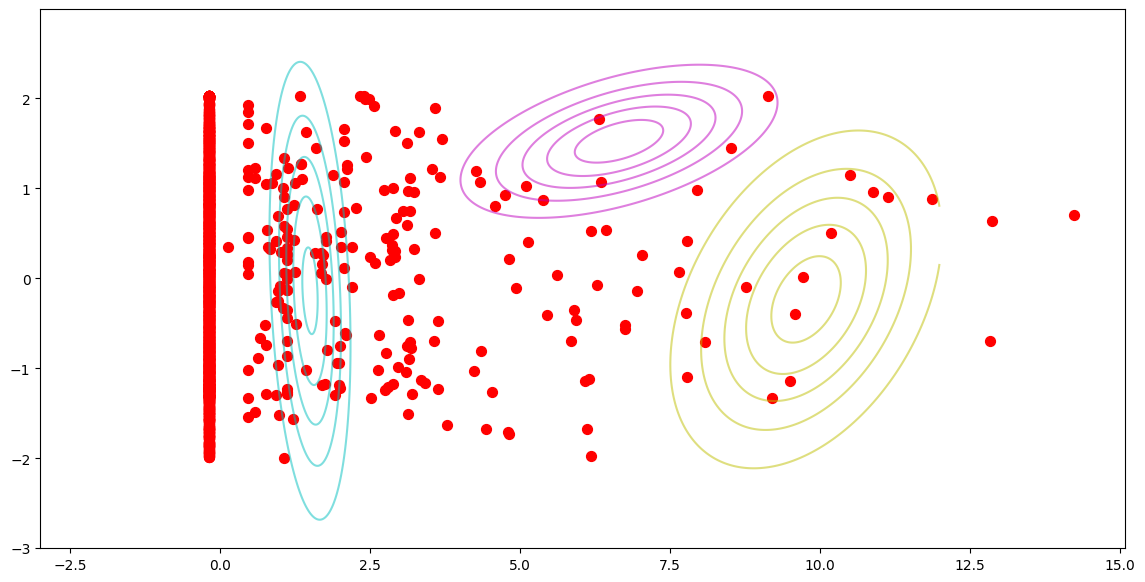

In [105]:
# Graficamos el ajuste inicial
# Se crea la matriz de datos
x, y = np.mgrid[-3:12:.01, -3:3:.01] 
pos = np.dstack((x, y))

# Calculate the Gaussian probability density function for each class
rv1 = multivariate_normal(mu_1, Sigma_1)
rv2 = multivariate_normal(mu_2, Sigma_2)
rv3 = multivariate_normal(mu_3, Sigma_3)
z1 = rv1.pdf(pos)
z2 = rv2.pdf(pos)
z3 = rv3.pdf(pos)

# Plot the Gaussian distributions
plt.figure(figsize=(14, 7))
plt.contour(x, y, z1, levels=5, colors='c', alpha=0.5)
plt.contour(x, y, z2, levels=5, colors='m', alpha=0.5)
plt.contour(x, y, z3, levels=5, colors='y', alpha=0.5)
plt.scatter(X_2d.iloc[:,0], X_2d.iloc[:,1], marker='o', color='r', s=50)


In [107]:
gama_Znk = np.zeros((X_2d.shape[0],3)) # Matriz de responsabilidades o Posterior P(zn|xn)

for n in range(X_2d.shape[0]):
  x_n = X_2d.iloc[n,:]
  for k in range(3):
    if k == 0:
      gama_Znk[n,k] = pi1 * multivariate_normal.pdf(x_n, mu_1, Sigma_1)/(pi1 * rv1.pdf(x_n) + pi2 * rv2.pdf(x_n) + pi3 * rv3.pdf(x_n))
    if k == 1:
      gama_Znk[n,k] = pi2 * multivariate_normal.pdf(x_n, mu_2, Sigma_2)/(pi1 * rv1.pdf(x_n) + pi2 * rv2.pdf(x_n) + pi3 * rv3.pdf(x_n))
    if k == 2:
      gama_Znk[n,k] = pi3 * multivariate_normal.pdf(x_n, mu_3, Sigma_3)/(pi1 * rv1.pdf(x_n) + pi2 * rv2.pdf(x_n) + pi3 * rv3.pdf(x_n))

print(gama_Znk)

[[9.81500674e-01 1.84993260e-02 9.14249831e-17]
 [9.79632887e-01 2.03671132e-02 9.94009788e-17]
 [9.83326679e-01 1.66733211e-02 8.36234909e-17]
 ...
 [9.99791823e-01 2.08176652e-04 3.26703670e-11]
 [9.99792799e-01 2.07201128e-04 3.27320709e-11]
 [9.99795700e-01 2.04300190e-04 3.29178542e-11]]


In [113]:
len(X_2d)

3999

In [117]:
X_2d.columns

Index(['qual_miles', 'days_since_enroll'], dtype='object')

In [120]:
# Construirmos el modelo discriminante
N1, N2, N3 = 1333,1333,1333
N = N1+N2+N3
piC1 = N1/N
piC2 = N2/N
piC3 = N3/N

X_d2 = X_2d

X_C1 = X_d2.iloc[:1333,:]
X_C2 = X_d2.iloc[1333:2666,:]
X_C3 = X_d2.iloc[2666:,:]

muC1 = np.mean(X_C1, axis=0)
muC2 = np.mean(X_C2, axis=0)
muC3 = np.mean(X_C3, axis=0)

M1 = np.tile(muC1, (N1,1))
M2 = np.tile(muC2, (N2,1))
M3 = np.tile(muC3, (N3,1))

S1 = (1./N1) * (X_C1 - M1).T.dot(X_C1 - M1)
S2 = (1./N2) * (X_C2 - M2).T.dot(X_C2 - M2)
S3 = (1./N3) * (X_C3 - M3).T.dot(X_C3 - M3)

Sigma = (N1/N)*S1 + (N2/N)*S2 + (N3/N)*S3

In [121]:
w_C1 = np.linalg.inv(Sigma).dot(muC1)
w_C2 = np.linalg.inv(Sigma).dot(muC2)
w_C3 = np.linalg.inv(Sigma).dot(muC3)

w_10 = -0.5 * (muC1.T.dot(np.linalg.inv(Sigma)).dot(muC1)) + np.log(piC1)
w_20 = -0.5 * (muC2.T.dot(np.linalg.inv(Sigma)).dot(muC2))+ np.log(piC2)
w_30 = -0.5 * (muC3.T.dot(np.linalg.inv(Sigma)).dot(muC3))+ np.log(piC3)

A1 = w_C1.T.dot(X_d2.T) + w_10
A2 = w_C2.T.dot(X_d2.T) + w_20
A3 = w_C3.T.dot(X_d2.T) + w_30

A = np.vstack((A1,A2,A3)).T

In [123]:
postCk = np.exp(A) / np.sum(np.exp(A), axis=1, keepdims=True)
postCk

array([[9.98277230e-01, 1.72276643e-03, 3.46552394e-09],
       [9.98064218e-01, 1.93577739e-03, 4.31793133e-09],
       [9.98477972e-01, 1.52202548e-03, 2.74335336e-09],
       ...,
       [5.40144848e-09, 6.96003614e-03, 9.93039958e-01],
       [5.36454014e-09, 6.93775259e-03, 9.93062242e-01],
       [5.25531914e-09, 6.87132614e-03, 9.93128669e-01]])

In [124]:
Sigma

,qual_miles,days_since_enroll
qual_miles,0.999510,-0.002841
days_since_enroll,-0.002841,0.158147


C:\Users\USER\AppData\Local\Temp\ipykernel_22232\905827997.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(muC1[0], muC1[1], marker='d', color='c', s=100, label='Class 1')
C:\Users\USER\AppData\Local\Temp\ipykernel_22232\905827997.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(muC2[0], muC2[1], marker='d', color='m', s=100, label='Class 2')
C:\Users\USER\AppData\Local\Temp\ipykernel_22232\905827997.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior).

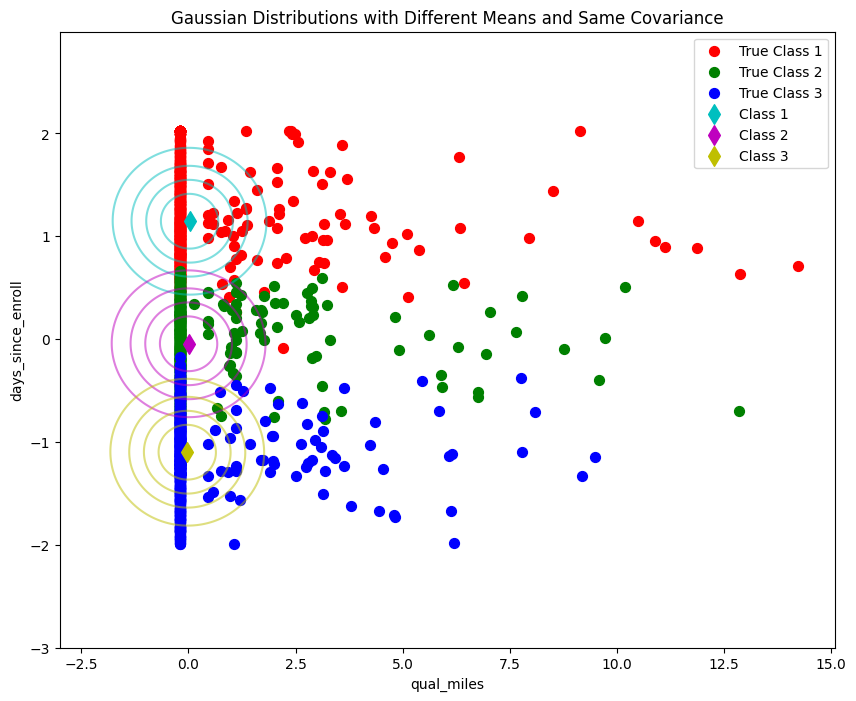

In [128]:
# Create a grid of points
x, y = np.mgrid[-3:12:.01, -3:3:.01] 
pos = np.dstack((x, y))

# Calculate the Gaussian probability density function for each class
rv1 = multivariate_normal(muC1, Sigma)
rv2 = multivariate_normal(muC2, Sigma)
rv3 = multivariate_normal(muC3, Sigma)
z1 = rv1.pdf(pos)
z2 = rv2.pdf(pos)
z3 = rv3.pdf(pos)

# Plot the Gaussian distributions
plt.figure(figsize=(10, 8))
plt.contour(x, y, z1, levels=5, colors='c', alpha=0.5)
plt.contour(x, y, z2, levels=5, colors='m', alpha=0.5)
plt.contour(x, y, z3, levels=5, colors='y', alpha=0.5)

# Plot the means of each class
plt.scatter(X_C1.iloc[:,0], X_C1.iloc[:,1], marker='o', color='r', s=50, label='True Class 1')
plt.scatter(X_C2.iloc[:,0], X_C2.iloc[:,1], marker='o', color='g', s=50, label='True Class 2')
plt.scatter(X_C3.iloc[:,0], X_C3.iloc[:,1], marker='o', color='b', s=50, label='True Class 3')

plt.scatter(muC1[0], muC1[1], marker='d', color='c', s=100, label='Class 1')
plt.scatter(muC2[0], muC2[1], marker='d', color='m', s=100, label='Class 2')
plt.scatter(muC3[0], muC3[1], marker='d', color='y', s=100, label='Class 3')

plt.xlabel('qual_miles')
plt.ylabel('days_since_enroll')
plt.title('Gaussian Distributions with Different Means and Same Covariance')
plt.legend()
plt.show()